## Target- urgent withdrawn by nurse(within 24hr)
* shift_applications status == 'cancelled' + shift_application prevStatus == 'confirmed'


### IDs -> only look at shifts application, leave each shifts after
* shift_applications id
* shift_applications user_id
* shift_applications shift_id


### Numeric Field
* shifts rate
* shifts net_pay: rate - nursedash profit
* shift_applications distance
* shift break time
* user withdrawn times: 
    Problem: 
        1. We don't know in reality that you will withdraw your previous one.
        2. cannot be used to predict new user
* user applied times:
* <b>prev SA/CW rate<b/>


## Time
### shift, shift app time
* S_Create (shift created) => SA_Create (application created) => CWTime (comfim withdrawn) => Start_Time (shift start)
* S_Create: shift create time
* SA_Create: shift application create time
* CWTime: shift withdrawn time, whole confirmed withdrawn population (include within 24hr and > 24hr)
* Start_Time: shift start time
##### calculated field, graph in hours
* <b>S_Create2SA_Create<b/>: shift application create time - shift create time
* <b>S_Create2Start_Time<b/>: shift start time - shift create time
        1. has negative values. delete maybe?
* <b>SA_Create2Start_Time<b/>: shift start time - shift application create time
        1. has negative values. delete maybe?

### User
* user approvedAt:
* user createdAt:
#### Calculated field
* U_Create2U_approved: User approve time - User create time
* <b>U_Create2now<b/>: now - User create time, in months(seconds/2629746)
* <b>U_Approve2now<b/>: now - User approve time


### Categorical
* shifts role: position name + type
* facilities name = facilities short_name
* facilities areaId = facilities areaName
* withdrawnInfo_key, withdrawnInfo_value
* facilities segmentName: Senior Living = 1, Healthcare = 0
* Users enableNotifications:
* Users emailNotifications:
* Users appNotifications:
* Users allowedNotifications:


### ?
* facilities allowedQualification
* facilities createdAt
* facilities rates
* nurse shift withdrawn by admin, when policy start, how many withdrawn by admin
* shifts = unit
* role
* users updateAt ?
* users relationToFacility

# Data Cleaning

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('main.csv')

In [10]:
df.columns

Index(['Unnamed: 0', 'id', 'user_id', 'shift_id', 'status', 'createdAt',
       'hasNurseCheckEvent', 'hasBreakTime', 'prevStatus', 'distance', 'id.1',
       'facility_id', 'description', 'start_time', 'assigned_nurse_id', 'rate',
       'net_pay', 'unit', 'type', 'createdAt.1', 'qualifications', 'breakTime',
       'prevStatus.1', 'id.2', 'name', 'short_name', 'createdAt.2', 'rates',
       'S_Create', 'SA_Create', 'S_create2SA_Create', 'Start_Time',
       'SA_Create2Start_Time', 'S_Create2Start_Time', 'CW_Time',
       'CW_Time2Start_Time', 'SA_Create2CW_Time', 'S_Create2CW_Time',
       'allowedQualifications', 'areaId', 'areaName', 'segmentName',
       'U_create2now', 'U_approve2now', 'U_create2U_approve',
       'withdrawnInfo_key', 'withdrawnInfo_value', 'tar'],
      dtype='object')

In [7]:
df.shape

(169654, 48)

In [27]:
#df['tar'] = df.apply(lambda x: 1 if x['status'] == 'withdrawn' and x['prevStatus'] == 'confirmed' and x['withdrawnInfo_value'] == 'nurse' and df['CW_Time2Start_Time'] > -24 else 0, axis =1)

In [24]:
def CW_by_nurse(row):
    if row['status']=='withdrawn' and row['prevStatus'] == 'confirmed':
        if row['withdrawnInfo_value'] == 'nurse':
            if row['CW_Time2Start_Time'] < 0 and row['CW_Time2Start_Time'] >= -24:
                return 1
            else:
                return 0
        else:
            return 0
    else:
        return 0
    
df['target'] = df.apply (lambda row: CW_by_nurse(row), axis=1)

In [26]:
df['target'].value_counts()

0    165284
1      4370
Name: target, dtype: int64

#### Calculated field
* U_Create2U_approve: User approve time - User create time
* U_Create2now: now - User create time, in months(seconds/2629746)
* U_Approve2now: now - User approve time

In [35]:
import seaborn as sns
from matplotlib import pyplot

<AxesSubplot:xlabel='target', ylabel='U_create2U_approve'>

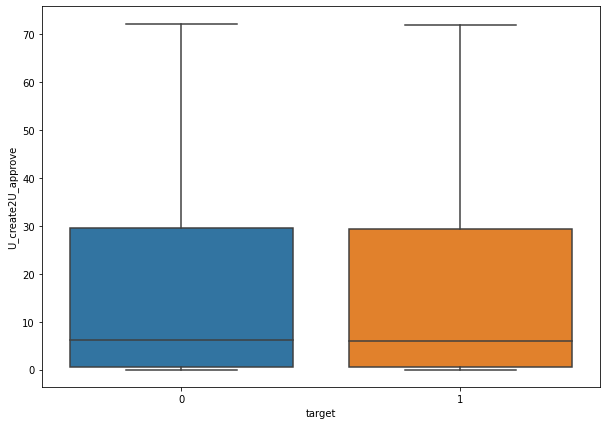

In [43]:
# U_create to U_approve (by hours)
size = (10, 7)
fig, ax = pyplot.subplots(figsize=size)
sns.boxplot(data = df,x = "target", y = "U_create2U_approve",showfliers=False)

<AxesSubplot:xlabel='target', ylabel='U_create2now'>

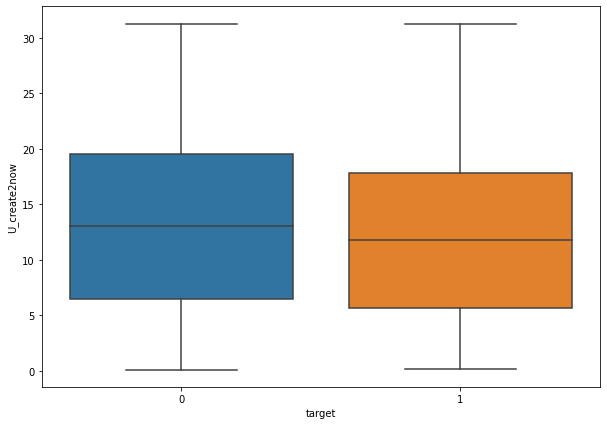

In [50]:
# U_create to now (by month)
size = (10, 7)
fig, ax = pyplot.subplots(figsize=size)
sns.boxplot(data = df,x = "target", y = "U_create2now",showfliers=False)

<AxesSubplot:xlabel='target', ylabel='U_approve2now'>

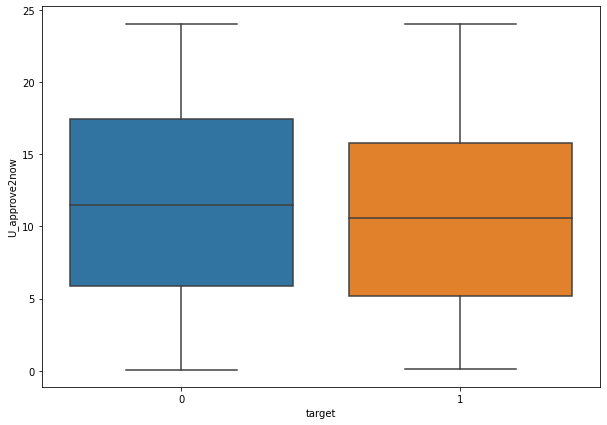

In [51]:
# U_approve to now (by month)
size = (10, 7)
fig, ax = pyplot.subplots(figsize=size)
sns.boxplot(data = df,x = "target", y = "U_approve2now",showfliers=False)

##### calculated field, graph in hours
* S_Create2SA_Create: shift application create time - shift create time
* S_Create2Start_Time: shift start time - shift create time
* SA_Create2Start_Time: shift start time - shift application create time

<AxesSubplot:xlabel='target', ylabel='S_create2SA_Create'>

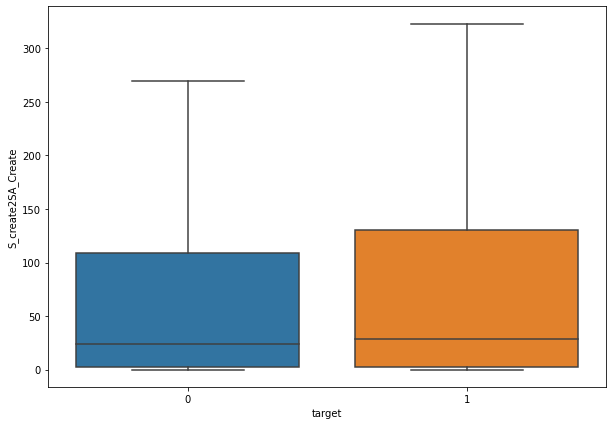

In [46]:
# S_Create to SA_Create (by hour)
size = (10, 7)
fig, ax = pyplot.subplots(figsize=size)
sns.boxplot(data = df,x = "target", y = "S_create2SA_Create",showfliers=False)

<AxesSubplot:xlabel='target', ylabel='S_Create2Start_Time'>

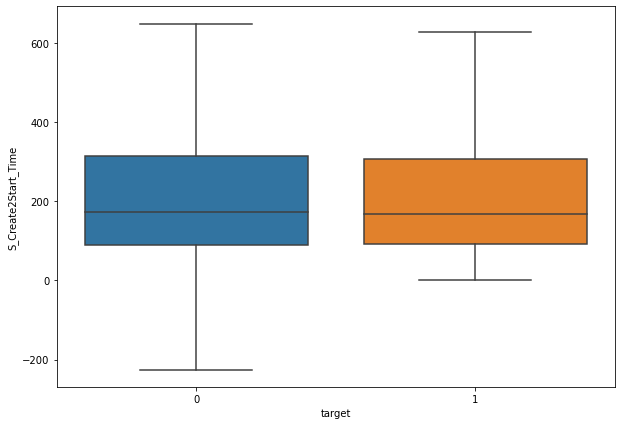

In [47]:
# S_Create to Start_Time (by hour)
size = (10, 7)
fig, ax = pyplot.subplots(figsize=size)
sns.boxplot(data = df,x = "target", y = "S_Create2Start_Time",showfliers=False)

In [49]:
# There are some negative numbers in this column. Not very much. 
# I think we need to delete these data entries since it make it impossible to nurse to apply on time.
df[df["S_Create2Start_Time"]<0].shape[0]

388

<AxesSubplot:xlabel='target', ylabel='SA_Create2Start_Time'>

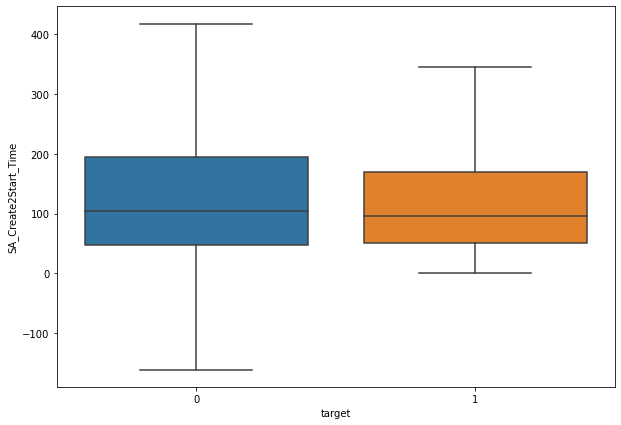

In [52]:
# SA_Create to Start_Time (by hour)
size = (10, 7)
fig, ax = pyplot.subplots(figsize=size)
sns.boxplot(data = df,x = "target", y = "SA_Create2Start_Time",showfliers=False)

In [53]:
# There are some negative numbers in this column. Not very much. 
# I think we need to delete these data entries since it make it impossible to nurse to apply on time.
df[df["SA_Create2Start_Time"]<0].shape[0]

1931

In [69]:
import numpy as np

In [129]:
# df2 is a sorted version of df1, data is exactly the same
df1 = df.set_index(['user_id','id'])
df2 = df1.sort_index()
df2 = df2.reset_index()

In [199]:
# df2.head(50)

,user_id,id,Unnamed: 0,shift_id,status,createdAt,hasNurseCheckEvent,hasBreakTime,prevStatus,distance,...,U_create2now,U_approve2now,U_create2U_approve,withdrawnInfo_key,withdrawnInfo_value,tar,target,count_prev_SA,count_prev_CW,prev_CW/SA_rate
0,18,29072,650,12460,applied,2019-09-11 17:58:36.854268,f,f,withdrawn,NaN,...,31.272810,24.076044,219.04706,NaN,NaN,0,0,0,0,0.0
1,18,29706,1473,12685,applied,2019-09-16 16:19:11.890038,f,f,NaN,NaN,...,31.272810,24.076044,219.04706,NaN,NaN,0,0,1,0,0.0
2,18,36042,9226,15920,confirmed,2019-10-29 01:59:31.169775,t,f,selected,NaN,...,31.272810,24.076044,219.04706,NaN,NaN,0,0,2,0,0.0
3,18,40273,14136,17541,confirmed,2019-11-18 20:14:34.591996,t,t,selected,NaN,...,31.272810,24.076044,219.04706,NaN,NaN,0,0,3,0,0.0
4,18,40656,14639,17809,interested,2019-11-20 03:53:30.618811,f,f,applied,NaN,...,31.272810,24.076044,219.04706,NaN,NaN,0,0,4,0,0.0
5,18,40657,14614,17796,applied,2019-11-20 03:57:07.474308,f,f,NaN,NaN,...,31.272810,24.076044,219.04706,NaN,NaN,0,0,5,0,0.0
6,18,40759,14612,17795,applied,2019-11-20 16:37:14.192365,f,f,NaN,NaN,...,31.272810,24.076044,219.04706,NaN,NaN,0,0,6,0,0.0
7,18,40760,14873,17920,confirmed,2019-11-20 16:37:53.532838,f,NaN,selected,NaN,...,31.272810,24.076044,219.04706,NaN,NaN,0,0,7,0,0.0
8,18,43574,18500,19122,confirmed,2019-12-05 17:17:14.436798,t,t,selected,NaN,...,31.272810,24.076044,219.04706,NaN,NaN,0,0,8,0,0.0
9,18,45071,19830,19564,applied,2019-12-12 22:02:43.231228,f,f,selected,NaN,...,31.272810,24.076044,219.04706,NaN,NaN,0,0,9,0,0.0


In [181]:
def count_prev_SA(df):
    count_prev_SA = []
    id_number = 0
    count = 0
    user_id = list(df2['user_id'])
    for i in user_id:
        if id_number == i:
            count += 1
            count_prev_SA.append(count)
            id_number = i
        else:
            count = 0
            count_prev_SA.append(count)
            id_number = i
    return count_prev_SA

        
df2['count_prev_SA'] = count_prev_SA(df2)

In [182]:
def count_prev_CW(df):
    count_prev_CW = []
    id_number = 0
    count = 0
    user_id = list(df2['user_id'])
    urgent_CW = list(df2['target'])
    for i,v in enumerate(user_id):
        if id_number == v:
            count_prev_CW.append(count)
            if urgent_CW[i] == 1:
                count += 1
            id_number = v
        else:
            count = 0
            count_prev_CW.append(count)
            if urgent_CW[i] == 1:
                count += 1
            id_number = v
    return count_prev_CW

        
df2['count_prev_CW'] = count_prev_CW(df2)

In [183]:
df2['prev_CW/SA_rate'] = df['count_prev_CW']/df['count_prev_SA']
df2['prev_CW/SA_rate'].fillna(0,inplace=True)

<AxesSubplot:xlabel='target', ylabel='prev_CW/SA_rate'>

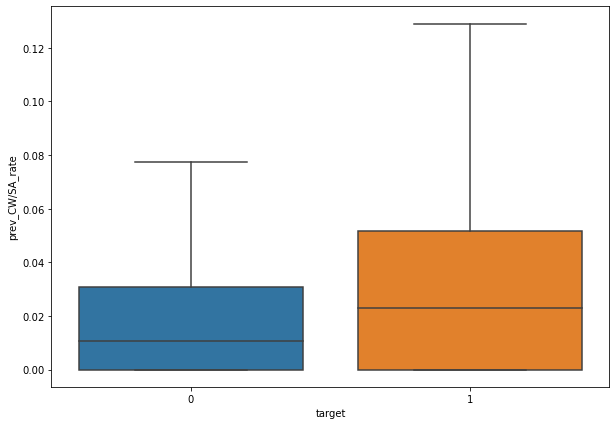

In [192]:
# prev_CW/SA_rate
size = (10, 7)
fig, ax = pyplot.subplots(figsize=size)
sns.boxplot(data = df2,x = "target", y = "prev_CW/SA_rate",showfliers=False)

### Additional User Analysis for potential user analysis

In [197]:
user_info = pd.DataFrame(df1.groupby('user_id')['target'].sum()).drop(['target'], axis=1)
count_CW = list(df1.groupby('user_id')['target'].sum())
count_SA = list(df1.groupby('user_id')['target'].count())
user_info['count_CW'] = count_CW
user_info['count_SA'] = count_SA
user_info['CW/SA_rate'] = user_info['count_CW']/user_info['count_SA']

In [198]:
user_info

,count_CW,count_SA,CW/SA_rate
user_id,,,
18,0,63,0.000000
31,2,145,0.013793
32,0,4,0.000000
38,0,7,0.000000
39,0,8,0.000000
...,...,...,...
16986,0,2,0.000000
17002,0,4,0.000000
17027,0,1,0.000000


<AxesSubplot:ylabel='Frequency'>

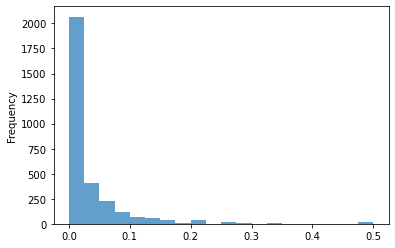

In [126]:
# User CW/SA_rate distribution
user_info['CW/SA_rate'].plot.hist(bins=20, alpha=0.7)